## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [16]:
import os
import keras

# 請嘗試設定 GPU：os.environ

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [27]:
## 資料前處理
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
    scaler = MinMaxScaler((-1,1))
    x = scaler.fit_transform(x)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [28]:

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [33]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [31]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [32]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.6951 - acc: 0.3960 - val_loss: 1.5402 - val_acc: 0.4526
Epoch 2/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.4803 - acc: 0.4762 - val_loss: 1.4537 - val_acc: 0.4850
Epoch 3/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.3773 - acc: 0.5136 - val_loss: 1.4234 - val_acc: 0.4989
Epoch 4/100
50000/50000 [==============================] - 9s 170us/step - loss: 1.3012 - acc: 0.5379 - val_loss: 1.3879 - val_acc: 0.5123
Epoch 5/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.2316 - acc: 0.5646 - val_loss: 1.4080 - val_acc: 0.5029
Epoch 6/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.1702 - acc: 0.5844 - val_loss: 1.3706 - val_acc: 0.5217
Epoch 7/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.1215 - acc: 0.6023 - val_loss: 1

50000/50000 [==============================] - 8s 164us/step - loss: 0.1601 - acc: 0.9444 - val_loss: 3.7160 - val_acc: 0.4874
Epoch 60/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.1650 - acc: 0.9422 - val_loss: 3.7698 - val_acc: 0.4859
Epoch 61/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.1858 - acc: 0.9352 - val_loss: 3.7741 - val_acc: 0.4945
Epoch 62/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.1596 - acc: 0.9429 - val_loss: 3.8489 - val_acc: 0.4991
Epoch 63/100
50000/50000 [==============================] - 8s 167us/step - loss: 0.1774 - acc: 0.9391 - val_loss: 3.8602 - val_acc: 0.4958
Epoch 64/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.1930 - acc: 0.9329 - val_loss: 3.7414 - val_acc: 0.4999
Epoch 65/100
50000/50000 [==============================] - 13s 252us/step - loss: 0.1657 - acc: 0.9436 - val_loss: 3.7872 - val_acc: 0.4911
Epoch 66/100
50000/50000 [=====

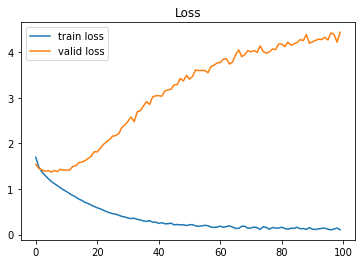

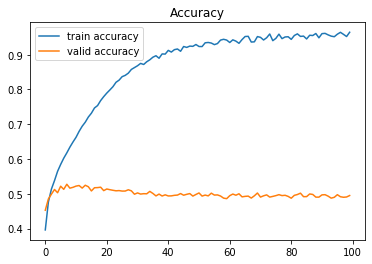

In [34]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()